# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from random import randint

# Mount Dataset Location 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Constants

In [ ]:
DATA_DIR = 'gdrive/MyDrive/datasets/Agriculture-Vision'
TRAINING = DATA_DIR + '/train'
TESTING = DATA_DIR + '/test'
VALIDATION = DATA_DIR + '/val'

NON_LABELS = ['rgb', 'nir', 'boundaries', 'masks']

LABELS = [
          'standing_water', 'waterway', 'double_plant',
          'cloud_shadow', 'weed_cluster', 'planter_skip'
]

# Data that we'll be grabbing images from
path = TRAINING

# Define image names and image locations

In [ ]:
image_names = {} 
directories = {}

# Build dictionary of image names and directories
for folder in os.listdir(path):
  # The 'labels' and 'images' folder have subfolders that need to be addressed 
  if folder == 'labels' or folder == 'images':
    for subfolder in os.listdir(path + '/' + folder):
      directories[subfolder] = path + '/' + folder + '/' + subfolder
      image_names[subfolder] = os.listdir(directories[subfolder])

  # Everything else is just a folder with images inside
  else:
    directories[folder] = path + '/' + folder
    image_names[folder] = os.listdir(directories[folder])

num_of_images = len(image_names['rgb'])

# Grab random sample 

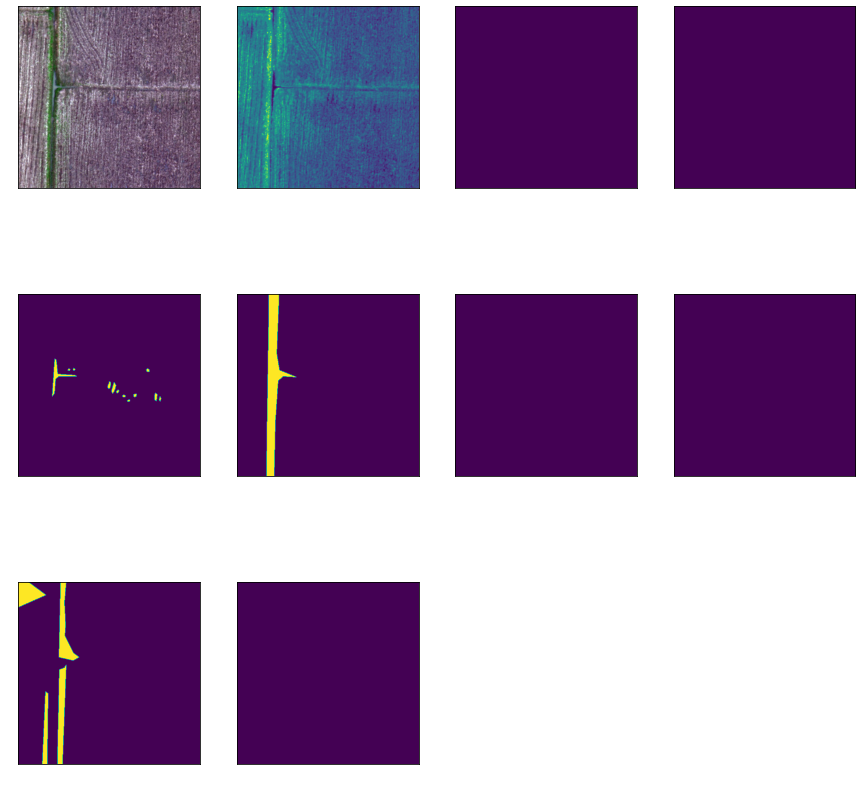

In [ ]:
# Select a random image
jpg_name = image_names['rgb'][randint(0, num_of_images-1)]
png_name = jpg_name[:-3] + 'png'

label_images = []
non_label_images = []

index = 0

plt.figure(figsize=(15,15))

# Non-labels = RGB, NIR, BOUNDARIES, and MASKS
for non_label in NON_LABELS:
  index += 1
  plt.subplot(3, 4, index)

  if non_label in ('rgb', 'nir'):
    image = plt.imread(directories[non_label] + '/' + jpg_name)
  else:
    image = plt.imread(directories[non_label] + '/' + png_name)

  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image)
  plt.xlabel(non_label.upper(), fontsize=20, fontweight='bold', color='white')

# Labels = the actual labels used during machine learning
for label in LABELS:
  index += 1
  plt.subplot(3, 4, index)
  image = plt.imread(directories[label] + '/' + png_name) 
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image)
  plt.xlabel(label.upper(), fontsize=20, fontweight='bold', color='white')

plt.xticks([])
plt.yticks([])
plt.show()